In [9]:
import iris
import holoviews as hv

In [11]:
import iris
import sklearn
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
import iris.quickplot as qplt
import matplotlib.pyplot as plt
from scipy.interpolate import spline, interp1d
from scipy.stats import norm, skew
from scipy.optimize import curve_fit
import scipy as sp
%matplotlib inline  

from __future__ import division

In [14]:
import numpy as np
import holoviews as hv
hv.notebook_extension()
%output holomap='auto'
%timer start

/Users/admin/miniconda2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Timer start: 2016/06/28 13:20:25


In [15]:
import json
import datetime as dt

from itertools import product

from matplotlib import pyplot as plt
import matplotlib.dates as md


try:
    from urllib2 import urlopen
except:
    from urllib.request import urlopen
from io import BytesIO

In [12]:
def load_temp(n):
    crut_file = "/Users/admin/Downloads/HadCRUT.4.4.0.0.anomalies.1_to_10_netcdf/HadCRUT.4.4.0.0.anomalies.%d.nc"%n
    crut = iris.load(crut_file)
    temp = crut[0]
    for t in range(temp.data.shape[0]):
#         temp.data[t] = temp.data[t] / max(temp.data[t].max(), -temp.data[t].min())
        temp.data[t].set_fill_value(temp.data[t].mean())
    return temp

temps = []
for i in range(1,11):
    temps.append(load_temp(i))
temps

/Users/admin/miniconda2/lib/python2.7/site-packages/iris/fileformats/cf.py:1139: UserWarning: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warnings.warn(msg)


[<iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>]

In [40]:
iris.FUTURE.cell_datetime_objects = True

In [135]:
X = temps[0].data.filled()

In [136]:
dates = temps[0].coord('time').points

In [137]:
dates.shape

(1995,)

In [138]:
X.shape

(1995, 36, 72)

In [139]:
date_dim = hv.Dimension("Date", value_format=md.DateFormatter('%b %d %Y %H:%M UTC'), type=float)
kdims = ['Frame', date_dim]

In [140]:
def imagize(data):
    res = data.reshape(data.shape[0], data.shape[1], 1)
    res = np.repeat(res, 3, axis=2)
    return res

In [141]:
%opts RGB [aspect=1]

In [151]:
srfc = [((frame, date), hv.RGB(imagize(X[frame]), bounds=(0,0)+X[frame].shape[0:2], xdensity=1))
        for frame, date in zip(range(len(dates)), dates)]

In [152]:
hadcrut = hv.HoloMap(srfc, kdims=kdims)

:RGB   [x,y]   (R,G,B)
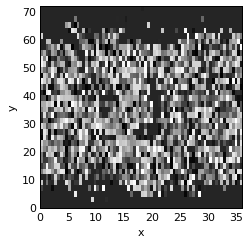

In [153]:
hadcrut.last

In [154]:
hadcrut.info

HoloMap containing 1995 items of type RGB
-----------------------------------------

Key Dimensions: 
	 Frame: 0...1994 
	 Date: Jan 15 0001 12:00 UTC...Mar 16 0167 12:00 UTC 
Deep Dimensions: 
	 x: 0...36 
	 y: 0...72 
	 R: 0...1 
	 G: 0...1 
	 B: 0...1 



:HoloMap   [Frame,Date]
   :RGB   [x,y]   (R,G,B)
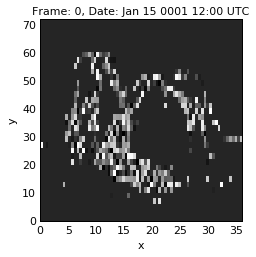
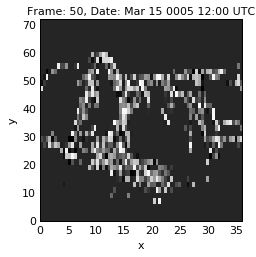
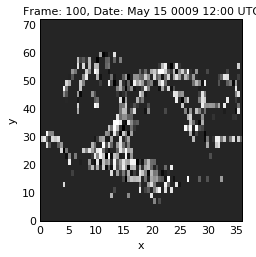
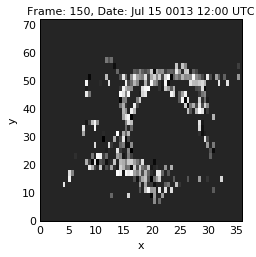
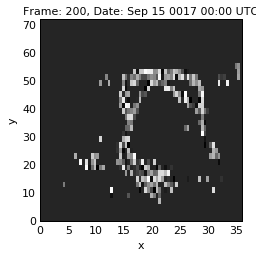
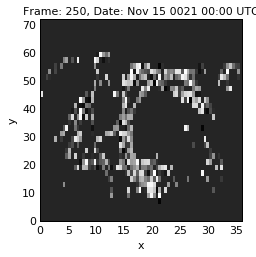
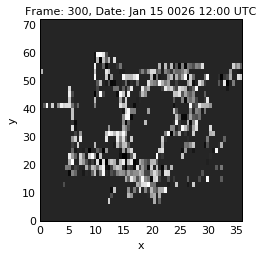
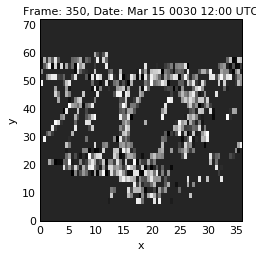
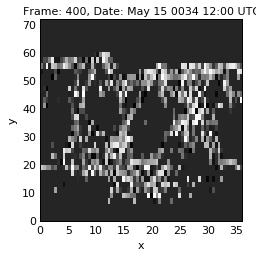
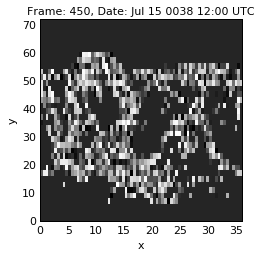
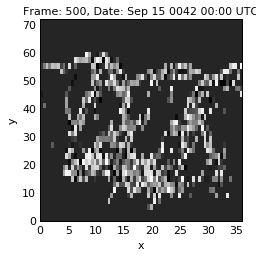
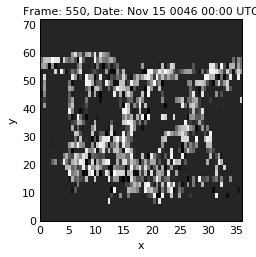
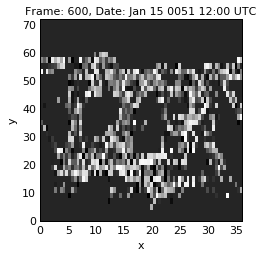
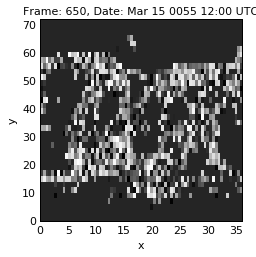
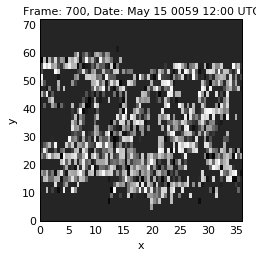
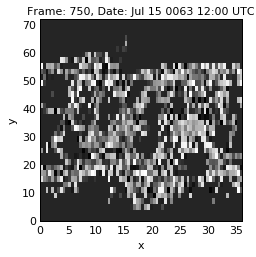
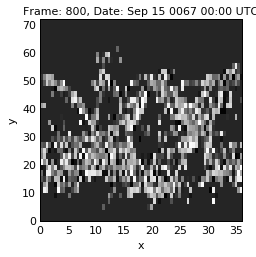
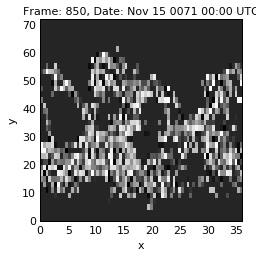
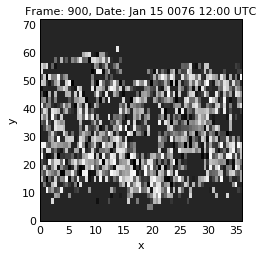
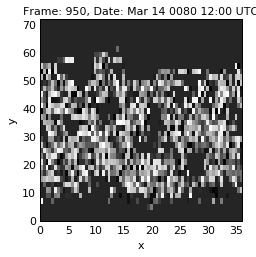
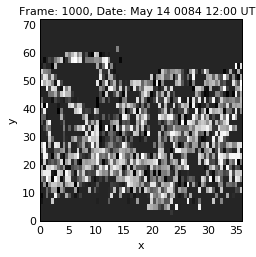
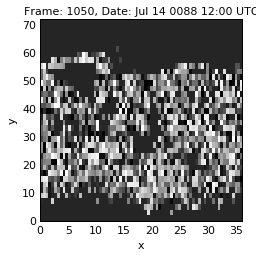
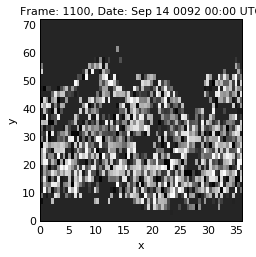
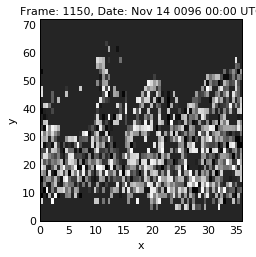
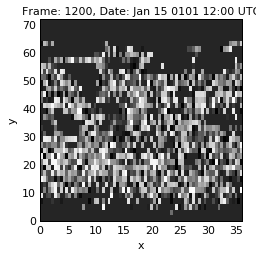
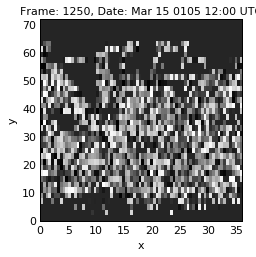
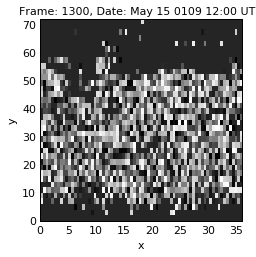
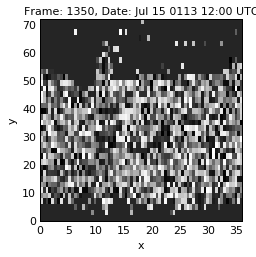
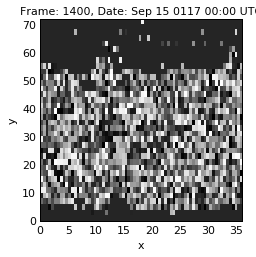
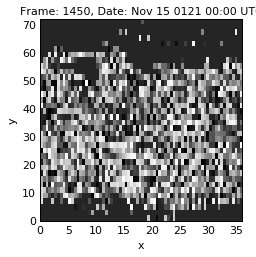
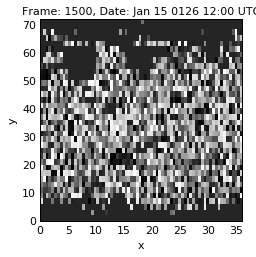
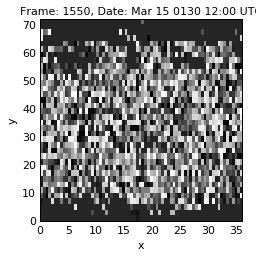
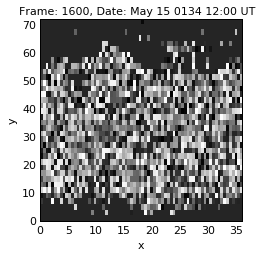
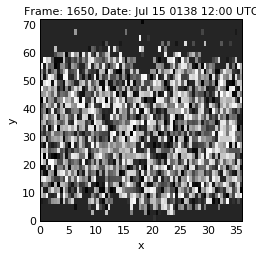
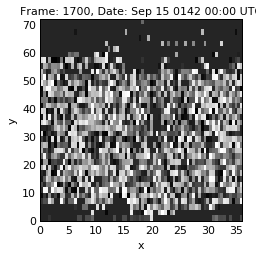
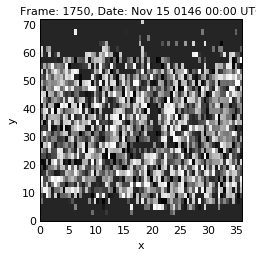
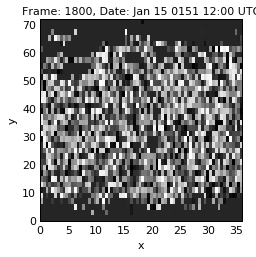
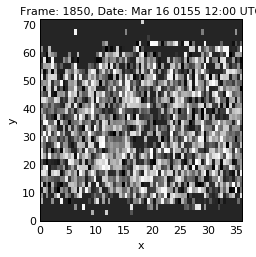
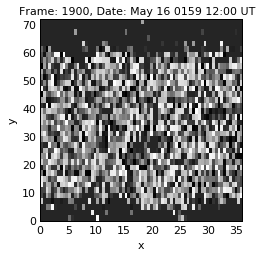
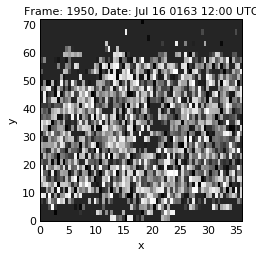

In [155]:
hadcrut[0:1995:50]

In [156]:
srfc2 = [((frame, date), hv.Image(X[frame], bounds=(0,0)+X[frame].shape[0:2], xdensity=1))
        for frame, date in zip(range(len(dates)), dates)]

In [157]:
hadcrut2 = hv.HoloMap(srfc, kdims=kdims)

:HoloMap   [Frame,Date]
   :RGB   [x,y]   (R,G,B)
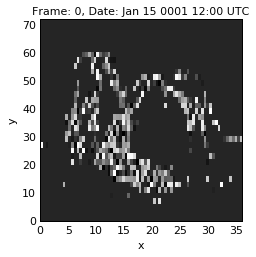
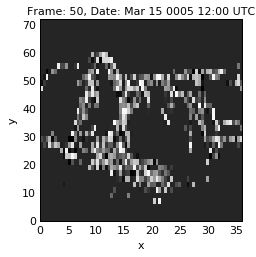
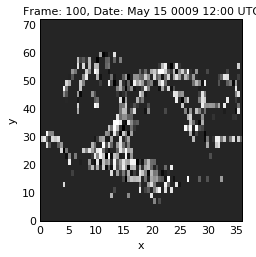
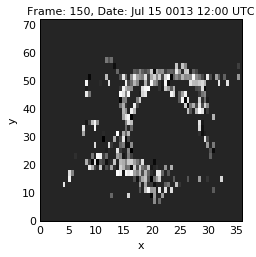
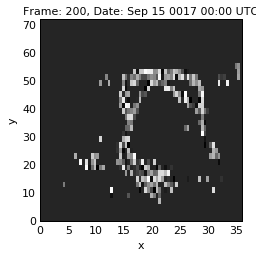
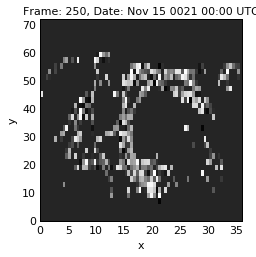
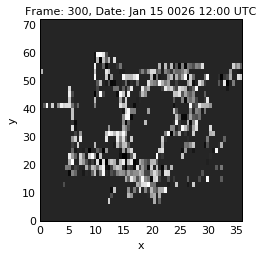
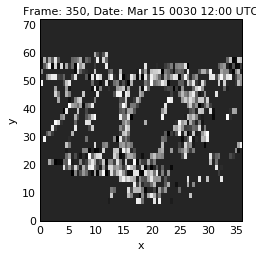
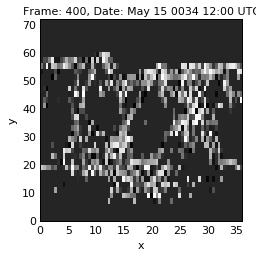
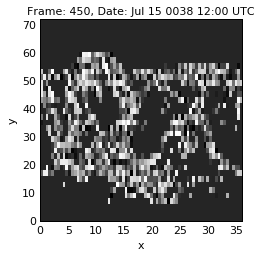
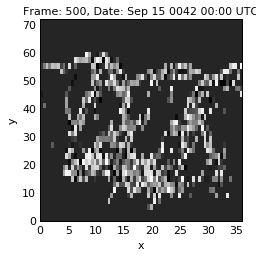
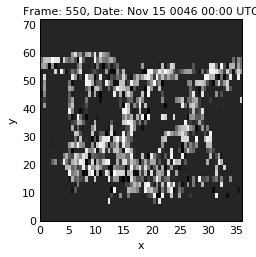
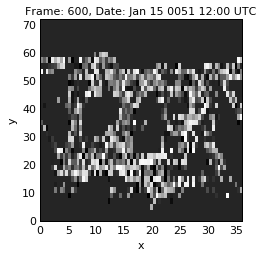
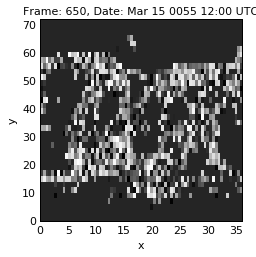
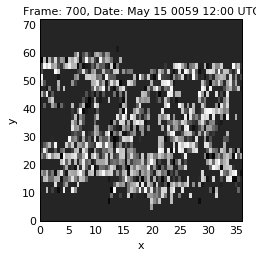
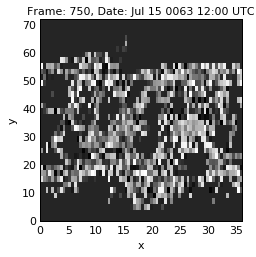
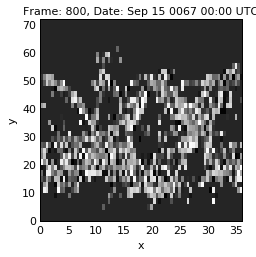
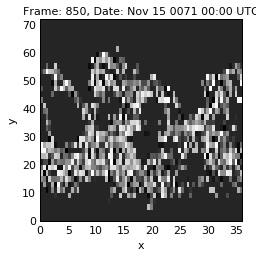
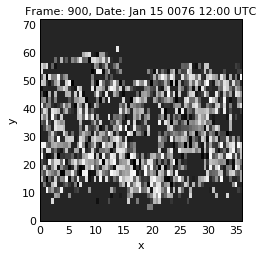
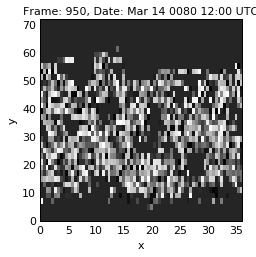
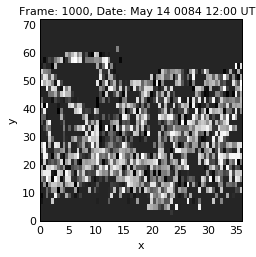
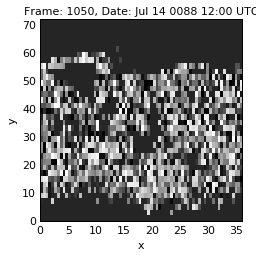
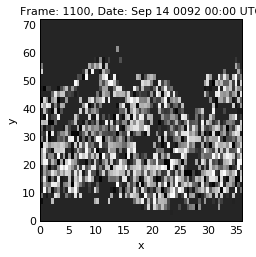
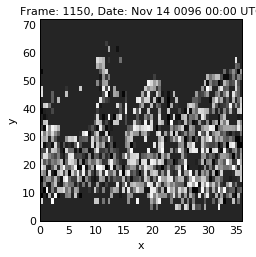
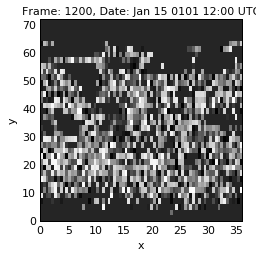
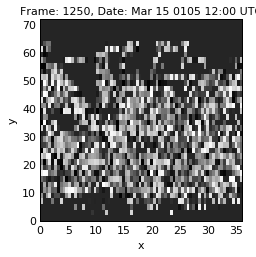
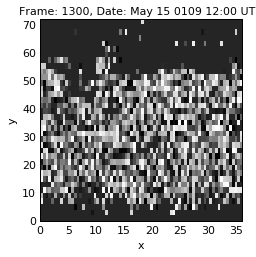
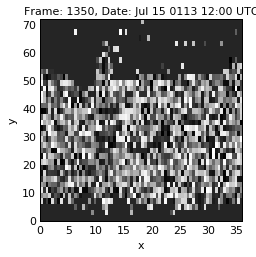
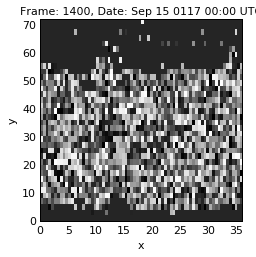
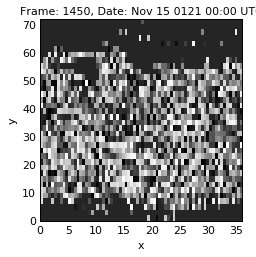
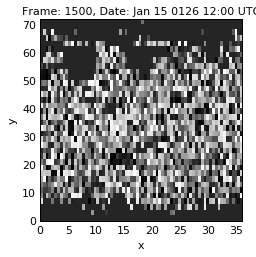
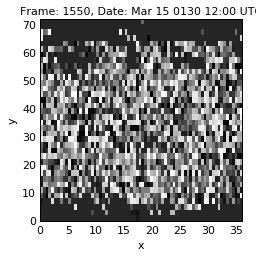
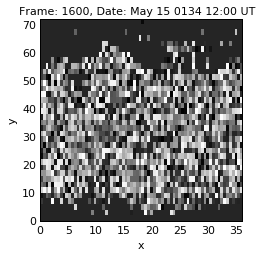
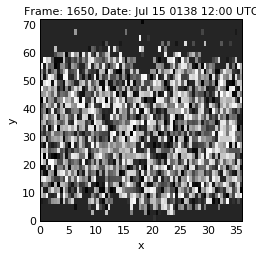
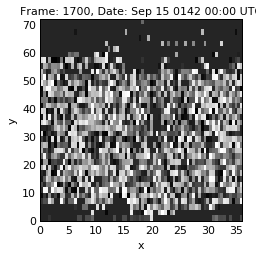
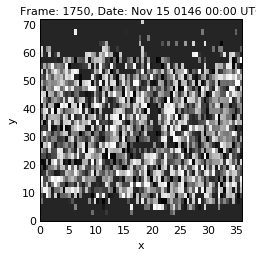
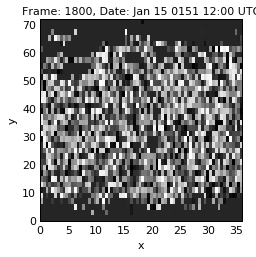
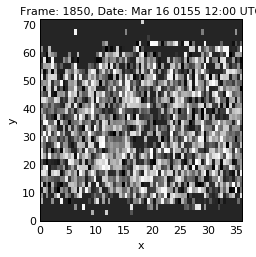
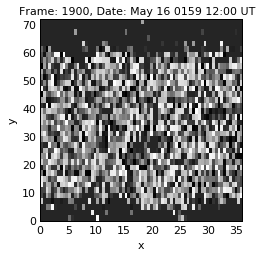
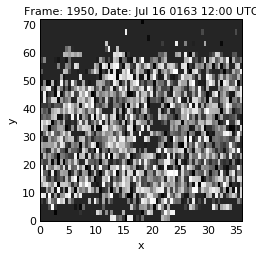

In [165]:
hadcrut2[0:1995:50]